# MOwNiT
## Laboratorium
### Całkowanie

In [88]:
using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [89]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585], [0.12948496616886981, 0.2797053914892767, 0.38183005050511887, 0.41795918367346907, 0.38183005050511887, 0.2797053914892767, 0.12948496616886981])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [90]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [91]:
function legendre_poly(n)
    if n==0
        return Polynomial([1])
    end
    if n==1
        return Polynomial([0,1])
    end
    m = zeros(Float64,n+1,n+1)
    m[1, 1] = 1
    m[2, 2] = 1
    
    for i in 3:n+1
        for j in 1:n
            m[i, j+1] += (2*i-3) / (i-1) * m[i-1,j]
            m[i,j] -= (i-2)/(i-1) * m[i-2,j]
        end
    end    
#     display(m)
    coefs = [m[n+1,j] for j in 1:n+1]
    result = Polynomial(coefs)
#     println(result)
    result
end
    

legendre_poly (generic function with 1 method)

In [92]:
legendre_poly(2)

Polynomial(-0.5 + 1.5*x^2)

In [93]:
legendre_poly(5)

Polynomial(1.8750000000000002*x - 8.75*x^3 + 7.875*x^5)

In [94]:
leg0 = x -> legendre_poly(0)(x)

#47 (generic function with 1 method)

In [95]:
leg0(3)

1

In [96]:
range1 = -1:0.01:1

-1.0:0.01:1.0

In [97]:
using Plots

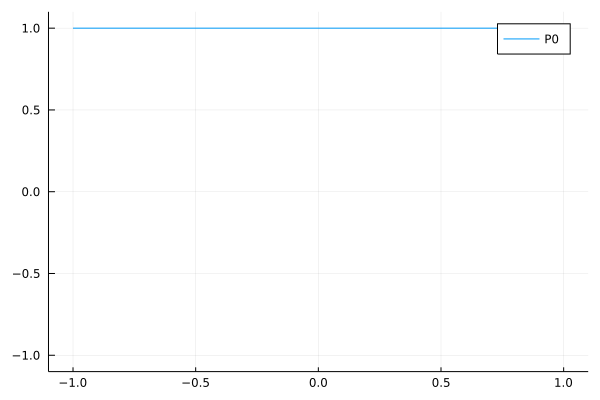

In [98]:
leg0 = x -> legendre_poly(0)(x)
plot(range1, leg0, label="P0",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))

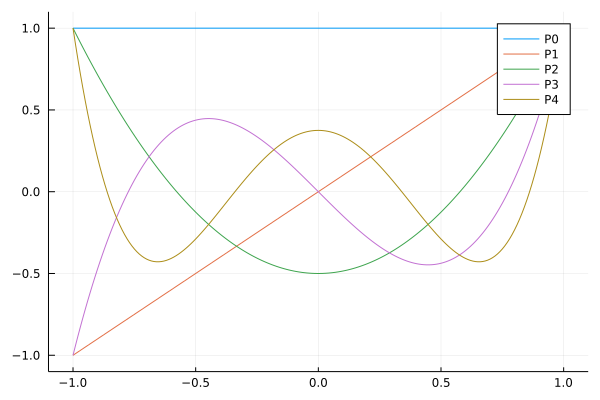

In [99]:
# 1
leg_poly =  legendre_poly(1)
values = [leg_poly(x) for x in  range1]
plot!(range1, values, label="P1",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 2
leg_poly =  legendre_poly(2)
values = [leg_poly(x) for x in  range1]
plot!(range1, values, label="P2",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 3
leg_poly =  legendre_poly(3)
values = [leg_poly(x) for x in  range1]
plot!(range1, values, label="P3",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 4
leg_poly =  legendre_poly(4)
values = [leg_poly(x) for x in  range1]
plot!(range1, values, label="P4",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))


#### Roots

In [100]:
println(gauss(Float64,3)[1])

[-0.7745966692414834, 0.0, 0.7745966692414834]


In [101]:
println(sort(roots(legendre_poly(3))))

[-0.7745966692414834, 0.0, 0.7745966692414835]


In [127]:
for i in 1:4
    println("   gauss: ",gauss(Float64,i)[1])
    println("legendre: ",sort(roots(legendre_poly(i))))
    println("------------------------------------------")
end

   gauss: [0.0]
legendre: [0.0]
------------------------------------------
   gauss: [-0.5773502691896258, 0.5773502691896258]
legendre: [-0.5773502691896258, 0.5773502691896256]
------------------------------------------
   gauss: [-0.7745966692414834, 0.0, 0.7745966692414834]
legendre: [-0.7745966692414834, 0.0, 0.7745966692414835]
------------------------------------------
   gauss: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
legendre: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
------------------------------------------


#### Podstawowe twierdzenie kwadratur Gaussa

Odcięte $ x_i $ n-punktowej kwadratury Gaussa z funkcją ważącą $ w(x) $
w $ [a, b] $ są zerami wielomianu ortogonalnego $ φ_n(x) $ dla tego
samego przedziału i tej samej funkcji ważącej.

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [103]:
gauss(3)

([-0.7745966692414834, 0.0, 0.7745966692414834], [0.5555555555555556, 0.8888888888888885, 0.5555555555555556])

In [104]:
function integral_gauss(fun, n)
    x, w = gauss(n)
    value = sum(fun.(x) .* w)
    return value
end

integral_gauss (generic function with 1 method)

In [105]:
integral_gauss(x -> (1), 4)

2.0

In [106]:
test_polynomials = [[if j != i  0 else i end for i in 1:j] for j in 1:10]

10-element Vector{Vector{Int64}}:
 [1]
 [0, 2]
 [0, 0, 3]
 [0, 0, 0, 4]
 [0, 0, 0, 0, 5]
 [0, 0, 0, 0, 0, 6]
 [0, 0, 0, 0, 0, 0, 7]
 [0, 0, 0, 0, 0, 0, 0, 8]
 [0, 0, 0, 0, 0, 0, 0, 0, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]

In [107]:
quad_degree = 3
println("Stopien kwadratury: ", quad_degree)

for poly in test_polynomials
    pn = Polynomial(poly)
    println(pn, "      ", integral_gauss(pn, quad_degree), "   expected   ", 1^length(poly) - ((-1)^length(poly)))
end

Stopien kwadratury: 3
1      1.9999999999999998   expected   2
2*x      0.0   expected   0
3*x^2      2.0   expected   2
4*x^3      0.0   expected   0
5*x^4      2.0   expected   2
6*x^5      0.0   expected   0
7*x^6      1.6800000000000006   expected   2
8*x^7      0.0   expected   0
9*x^8      1.2960000000000005   expected   2
10*x^9      0.0   expected   0


In [108]:
test_frame = DataFrame(quad_deg = Int64[], poly_deg = Int64[], gauss_val = Float64[], exp_val = Float64[])

,quad_deg,poly_deg,gauss_val,exp_val
,Int64,Int64,Float64,Float64


In [109]:
for poly in test_polynomials
    pn = Polynomial(poly)
    poly_deg = length(poly) - 1
    push!(test_frame, [3 poly_deg integral_gauss(pn, quad_degree) 1^length(poly) - ((-1)^length(poly))])
end

In [110]:
test_frame

,quad_deg,poly_deg,gauss_val,exp_val
,Int64,Int64,Float64,Float64
1,3,0,2.0,2.0
2,3,1,0.0,0.0
3,3,2,2.0,2.0
4,3,3,0.0,0.0
5,3,4,2.0,2.0
6,3,5,0.0,0.0
7,3,6,1.68,2.0
8,3,7,0.0,0.0
9,3,8,1.296,2.0


Poniewaz stopien kwadratury wynosi $ 3 $, powolujac sie na twierdzenie o stopniu dokładności kwadratury Gaussa, spodziewam sie dokladnego wyniku dla wielomianow maksymalnie $ 5 $ stopnia
Widac to wyraznie w DataFrame - dla wielomianu stopnia 6 mamy niedokladny wynik

#### Twierdzenie o stopniu dokładności kwadratury Gaussa

Kwadratura ma stopien dokladnosci $ 2n - 1 $ dla  $ n $ punktowej kwadratury

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [111]:
function integral_gauss_interval(fun, a, b, n)
    x, w = gauss(n)
#     println(x)
    x = (b-a)/2 *x .+ (b+a)/2
#     println(x)
    value = (b-a)/2 * sum(fun.(x) .* w)
    return value
end

integral_gauss_interval (generic function with 1 method)

In [112]:
println("expected value: ", 80)
for i in 1:5
    println("dla ",i," pkt kwadratury : ", 
        integral_gauss_interval(x -> 4*x^3, 1, 3, i))
end

expected value: 80
dla 1 pkt kwadratury : 64.0
dla 2 pkt kwadratury : 79.99999999999999
dla 3 pkt kwadratury : 79.99999999999999
dla 4 pkt kwadratury : 80.0
dla 5 pkt kwadratury : 79.99999999999999


In [113]:
println("expected value: ", 2)
for i in 1:5
    println("dla ",i," pkt kwadratury : ",
        integral_gauss_interval(sin, 0, pi, i))
end

expected value: 2
dla 1 pkt kwadratury : 3.141592653589793
dla 2 pkt kwadratury : 1.9358195746511362
dla 3 pkt kwadratury : 2.0013889136077427
dla 4 pkt kwadratury : 1.9999842284577216
dla 5 pkt kwadratury : 2.0000001102844713


In [114]:
println("expected value: ", exp(1))
for i in 1:5
    println("dla ",i," pkt kwadratury : ",
        integral_gauss_interval(x -> exp(x) + 1, 0, 1, i))
end

expected value: 2.718281828459045
dla 1 pkt kwadratury : 2.648721270700128
dla 2 pkt kwadratury : 2.717896378007503
dla 3 pkt kwadratury : 2.7182810043725216
dla 4 pkt kwadratury : 2.7182818275260776
dla 5 pkt kwadratury : 2.718281828458391


### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności. Policz całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [115]:
test_poly = Polynomial([1,54,213,8,32,8,2,8 - 4])
value, error = quadgk(test_poly, -1, 1)

(157.37142857142857, 2.842170943040401e-14)

In [116]:
normal_distribution = x -> 1/sqrt(2*pi) * exp(-x^2 / 2)
value, error = quadgk(normal_distribution, -Inf,Inf)

(1.0000000000032583, 1.4395584885993386e-8)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie, 
w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [117]:
function rectangle_integration(fun, a, b, n)
    value = 0
    h = (b-a)/n
    for i in 1:n
       value += fun(a + (i-1)*h + h/2) * h
    end
    value
end

rectangle_integration (generic function with 1 method)

In [118]:
rectangle_integration(exp, 0, 1, 1)

1.6487212707001282

In [119]:
using DataFrames

In [120]:
df1 = DataFrame(count = Int64[], 
    t = String[],
    error = Float64[])

,count,t,error
,Int64,String,Float64


In [121]:
for i=1:1:100
    push!(df1, [i "exp" abs( rectangle_integration(exp, -10, 0, i)  -(exp(0)-exp(-10)) ) ])
    push!(df1, [i "sin" abs( rectangle_integration(sin, 0, 2*pi, i) -(-cos(2*pi)+cos(0)) ) ])
    push!(df1, [i "ln" abs( rectangle_integration(x -> 1/x, 1/2, 10, i) -(log(10) - log(1/2)) ) ])
end

In [122]:
df1;

In [123]:
# using Plots

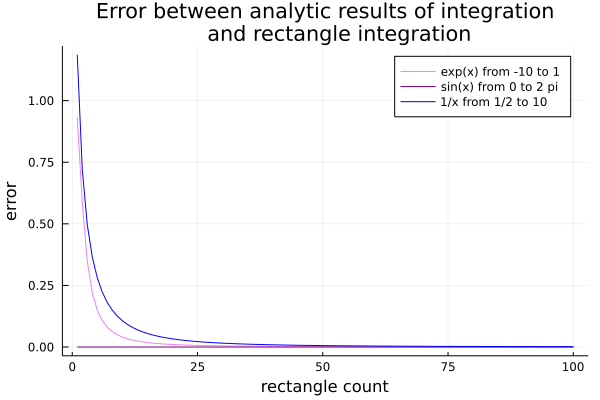

In [124]:
plot([ df1[df1[:,2] .== "exp", :].count df1[df1[:,2] .== "sin", :].count  df1[df1[:,2] .== "ln", :].count ],
    [ df1[df1[:,2] .== "exp", :].error  df1[df1[:,2] .== "sin", :].error df1[df1[:,2] .== "ln", :].error ],
    colour = [:violet :purple :blue],
    label = [ "exp(x) from -10 to 1" "sin(x) from 0 to 2 pi" "1/x from 1/2 to 10" ],
    title = "Error between analytic results of integration
    and rectangle integration",
    xlab = "rectangle count",
    ylab = "error"
)